In [37]:
from pathlib import Path
import numpy as np
# cfg should save and preset the proper criteria.
from cfg import (winSize, zeroZone, criteria, pattern_size)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
class CornersNotFound(Exception):
    pass

In [39]:
def findCorners(image, pattern_size, winSize, zeroZone, criteria):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found, corners = cv2.findChessboardCorners(gray, pattern_size)
    
    if found:
        return(cv2.cornerSubPix(gray, corners, winSize, zeroZone, criteria))
    else:
        raise CornersNotFound("CornersNotFound")

In [40]:
image_path = str(Path('/home/jsk/GitHub/cv2stuff/data/images/'))
left_image = image_path + '/left01.jpg'
left_image

'/home/jsk/GitHub/cv2stuff/data/images/left01.jpg'

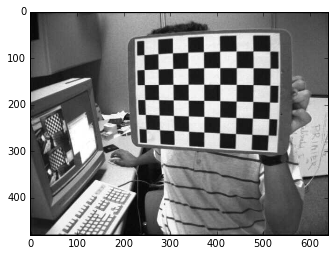

In [41]:
image = cv2.imread(left_image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [42]:
try:
    corners = findCorners(image_rgb, pattern_size, winSize, zeroZone, criteria)
except CornersNotFound:
    corners = []

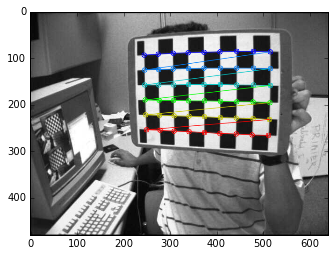

In [43]:
cv2.drawChessboardCorners(image_rgb, pattern_size, corners, True)
plt.imshow(image_rgb)

In [44]:
height, width = image_rgb.shape[:2]
height, width

(480, 640)

In [45]:
images_path = Path('/home/jsk/GitHub/cv2stuff/data/images')
images_paths = set(images_path.glob('left*[0-9].jpg'))

In [46]:
corners_reshape = (-1, 2)
corners_new = corners.reshape(-1, 2)

In [47]:
corners.shape

(54, 1, 2)

In [48]:
corners_new.shape

(54, 2)

In [49]:
corners[0,0,0]

244.40532

In [50]:
corners.dtype

dtype('float32')

In [51]:
def intializePatternPoints(pattern_size):
    pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
    pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
    return(pattern_points)

In [52]:
def findAllCorners(pattern_size, image_paths, winSize, zeroZone, criteria):
    object_points, image_points = [], []
    
    pattern_points = intializePatternPoints(pattern_size)
    for image_path in image_paths:
        try:
            image_bgr = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
            corners = findCorners(image_rgb, pattern_size, winSize, zeroZone, criteria)
        except CornersNotFound:
            pass
            
        object_points.append(corners)
        image_points.append(pattern_points)
        return(object_points, image_points)

In [53]:
def initializeImagePaths(glob_pattern):
    image_paths = set()
    for path in glob_pattern:
        image_paths.add(str(path))
    return(image_paths)


In [54]:
image_path = Path('/home/jsk/GitHub/cv2stuff/data/images')
image_glob = image_path.glob('left*[0-9].jpg')
image_paths = initializeImagePaths(image_glob)
image_paths

{'/home/jsk/GitHub/cv2stuff/data/images/left01.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left02.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left03.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left04.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left05.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left06.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left07.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left08.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left09.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left11.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left12.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left13.jpg',
 '/home/jsk/GitHub/cv2stuff/data/images/left14.jpg'}

In [55]:
image_points, object_points = findAllCorners(pattern_size, image_paths, winSize, zeroZone, criteria)

In [56]:
object_points

[array([[ 0.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 2.,  0.,  0.],
        [ 3.,  0.,  0.],
        [ 4.,  0.,  0.],
        [ 5.,  0.,  0.],
        [ 6.,  0.,  0.],
        [ 7.,  0.,  0.],
        [ 8.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 1.,  1.,  0.],
        [ 2.,  1.,  0.],
        [ 3.,  1.,  0.],
        [ 4.,  1.,  0.],
        [ 5.,  1.,  0.],
        [ 6.,  1.,  0.],
        [ 7.,  1.,  0.],
        [ 8.,  1.,  0.],
        [ 0.,  2.,  0.],
        [ 1.,  2.,  0.],
        [ 2.,  2.,  0.],
        [ 3.,  2.,  0.],
        [ 4.,  2.,  0.],
        [ 5.,  2.,  0.],
        [ 6.,  2.,  0.],
        [ 7.,  2.,  0.],
        [ 8.,  2.,  0.],
        [ 0.,  3.,  0.],
        [ 1.,  3.,  0.],
        [ 2.,  3.,  0.],
        [ 3.,  3.,  0.],
        [ 4.,  3.,  0.],
        [ 5.,  3.,  0.],
        [ 6.,  3.,  0.],
        [ 7.,  3.,  0.],
        [ 8.,  3.,  0.],
        [ 0.,  4.,  0.],
        [ 1.,  4.,  0.],
        [ 2.,  4.,  0.],
        [ 3.,  4.,  0.],


In [57]:
image_points

[array([[[ 436.27337646,   49.71625519]],
 
        [[ 448.95608521,   77.8157959 ]],
 
        [[ 462.56408691,  108.73793793]],
 
        [[ 477.08401489,  142.88763428]],
 
        [[ 492.46768188,  180.42779541]],
 
        [[ 508.65921021,  221.37123108]],
 
        [[ 525.28790283,  265.940979  ]],
 
        [[ 542.3885498 ,  313.81158447]],
 
        [[ 559.30169678,  364.59451294]],
 
        [[ 397.76010132,   57.83538437]],
 
        [[ 408.56661987,   86.37736511]],
 
        [[ 420.5319519 ,  117.96659851]],
 
        [[ 433.18371582,  152.89202881]],
 
        [[ 446.84320068,  191.20083618]],
 
        [[ 461.26177979,  233.17112732]],
 
        [[ 476.29312134,  278.67022705]],
 
        [[ 491.83947754,  327.8241272 ]],
 
        [[ 507.68966675,  379.70913696]],
 
        [[ 358.39981079,   66.66493225]],
 
        [[ 367.57821655,   95.66712952]],
 
        [[ 377.36938477,  127.79225159]],
 
        [[ 388.26965332,  163.42037964]],
 
        [[ 399.85873413,  202.29

In [66]:
undistort_image = str(Path('/home/jsk/GitHub/cv2stuff/data/images/undistort.jpg'))

In [67]:
image_bgr = cv2.imread(undistort_image)
heigth, width = image_bgr.shape[:2]
width, height

(640, 480)

In [60]:
rms, camera_matrix, distortion_coeficients, rotation_vectors, translation_vectors = \
    cv2.calibrateCamera(object_points, image_points, (width, height), None, None) 

In [61]:
camera_matrix

array([[ 628.99803077,    0.        ,  321.61760204],
       [   0.        ,  640.7759953 ,  199.33760571],
       [   0.        ,    0.        ,    1.        ]])

In [62]:
rms

0.14329251214954217

In [63]:
distortion_coeficients

array([[-0.39739852, -0.03035544,  0.0228357 ,  0.01347597,  0.41850775]])

In [64]:
rotation_vectors

[array([[-0.35358963],
        [ 0.51719743],
        [ 1.30454888]])]

In [65]:
translation_vectors

[array([[  2.8379715 ],
        [ -3.68537301],
        [ 14.95393764]])]